# 1. Python Fundamentals (20 points)

In [93]:
import pandas as pd
import numpy as np 

# read .cvs files
dfArticle = pd.read_csv('articleInfo.csv')
dfAuthor = pd.read_csv('authorInfo.csv')

# perform outer join method in python pandas
df = pd.merge(dfArticle, dfAuthor, on='Article No.', how='outer').fillna(0)
#df.to_csv('merged.csv')   | only needed to double check data


# now we import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# create new_df to make alterations to main df
new_df = df

# sort ascending according to year
new_df = new_df.sort_values('Year', ascending = True)

# keep one instance of each year (total 6)
x = new_df['Year'].drop_duplicates(keep = 'first', inplace = False)

# select Year column, count number of times that a year appears, and drop duplicates that are created
y = new_df['Year'].value_counts().sort_values() #[new_df.Year.sort_values()].drop_duplicates()
print(y)

2017     13
2018     23
2019     26
2020     93
2021    133
2022    183
Name: Year, dtype: int64


## 1. Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.

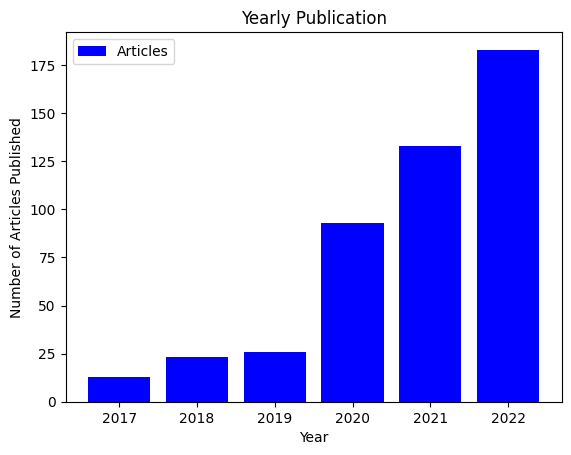

In [94]:
plt.bar(x, y, width = 0.8, color = 'b')
plt.title('Yearly Publication')
plt.xlabel('Year')
plt.ylabel('Number of Articles Published')
plt.legend(["Articles"])
plt.show()

## 2. Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.

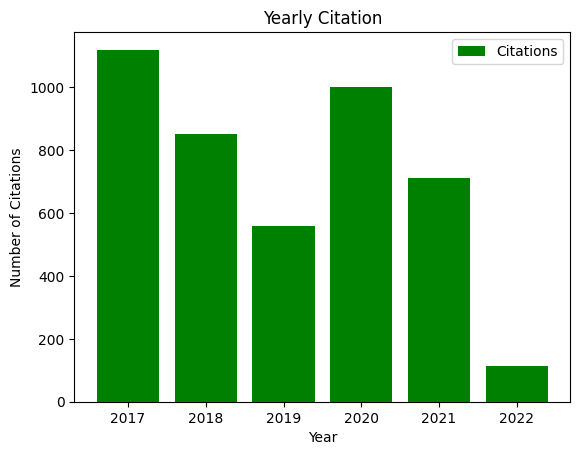

In [95]:
# drop 'Article No.' duplicates because to keep them would not be logical
new_df = df.drop_duplicates(subset = "Article No.", keep = 'first', inplace = False)

# x = x from before because it has not been changed

y = new_df.groupby(['Year'])['Citation'].sum()

plt.bar(x, y, width = 0.8, color = 'g')
plt.title('Yearly Citation')
plt.xlabel('Year')
plt.ylabel('Number of Citations')
plt.legend(["Citations"])
plt.show()

## 3. Plot the figure of the number of publications across countries. You may use any available python libraries, such as pygal_maps_world, geopandas, or others.

In [96]:
import pygal
import pygal_maps_world
from pygal_maps_world.maps import World

# take df from earlier and remove instances where country == 0
country_df = df[df['Country'] != 0]
# export to csv to personally confirm new df, not needed after finishing
# country_df.to_csv('country.csv')


# function to convert country into pygal country code
def countryToCode(name):
    if (name == "Australia"):
        return 'au'  
    if (name == "Canada"):
        return 'ca'  
    if (name == "Chile"):
        return 'cl'  
    if (name == "China"):
        return 'cn'  
    if (name == "Cyprus"):
        return 'cy' 
    if (name == "Czech Republic"):
        return 'cz' 
    if (name == "Denmark"):
        return 'dk' 
    if (name == "France"):
        return 'fr' 
    if (name == "Germany"):
        return 'de'  
    if (name == "Hong Kong"):
        return 'hk' 
    if (name == "India"):
        return 'in' 
    if (name == "Ireland"):
        return 'ie'  
    if (name == "Italy"):
        return 'it'  
    if (name == "Korea"):
        return 'kr'  
    if (name == "Liechtenstein"):
        return 'li'  
    if (name == "Malaysia"):
        return 'my'  
    if (name == "Mexico"):
        return 'mx'  
    if (name == "Pakistan"):
        return 'pk'  
    if (name == "Palestine"):
        return 'ps'  
    if (name == "Russia"):
        return 'ru' 
    if (name == "Slovakia"):
        return 'si'  
    if (name == "South Africa"):
        return 'za' 
    if (name == "Spain"):
        return 'es'  
    if (name == "Switzerland"):
        return 'ch'  
    if (name == "Taiwan"):
        return 'tw'  
    if (name == "USA"):
        return 'us'  
    if (name == "Ukraine"):
        return 'ua'  
    if (name == "United Kingdom"):
        return 'gb'  
    


worldmap = World()
worldmap.title = 'Countries'
# for each country, assign the number of times that country appears
worldmap.add('No. of Publications', {
    countryToCode("Canada") :  country_df['Country'].value_counts()["Canada"],
    countryToCode("Australia") :  country_df['Country'].value_counts()["Australia"],
    countryToCode("China") :  country_df['Country'].value_counts()["China"],
    countryToCode("Chile") :  country_df['Country'].value_counts()["Chile"],
    countryToCode("Cyprus") :  country_df['Country'].value_counts()["Cyprus"],
    countryToCode("Czech Republic") :  country_df['Country'].value_counts()["Czech Republic"],
    countryToCode("Denmark") :  country_df['Country'].value_counts()["Denmark"],
    countryToCode("France") :  country_df['Country'].value_counts()["France"],
    countryToCode("Germany") :  country_df['Country'].value_counts()["Germany"],
    countryToCode("Hong Kong") :  country_df['Country'].value_counts()["Hong Kong"],
    countryToCode("India") :  country_df['Country'].value_counts()["India"],
    countryToCode("Ireland") :  country_df['Country'].value_counts()["Ireland"],
    countryToCode("Italy") :  country_df['Country'].value_counts()["Italy"],
    countryToCode("Korea") :  country_df['Country'].value_counts()["Korea"],
    countryToCode("Liechtenstein") :  country_df['Country'].value_counts()["Liechtenstein"],
    countryToCode("Malaysia") :  country_df['Country'].value_counts()["Malaysia"],
    countryToCode("Mexico") :  country_df['Country'].value_counts()["Mexico"],
    countryToCode("Pakistan") :  country_df['Country'].value_counts()["Pakistan"],
    countryToCode("Palestine") :  country_df['Country'].value_counts()["Palestine"],
    countryToCode("Russia") :  country_df['Country'].value_counts()["Russia"],
    countryToCode("Slovakia") :  country_df['Country'].value_counts()["Slovakia"],
    countryToCode("South Africa") :  country_df['Country'].value_counts()["South Africa"],
    countryToCode("Spain") :  country_df['Country'].value_counts()["Spain"],
    countryToCode("Switzerland") :  country_df['Country'].value_counts()["Switzerland"],
    countryToCode("Taiwan") :  country_df['Country'].value_counts()["Taiwan"],
    countryToCode("USA") :  country_df['Country'].value_counts()["USA"],
    countryToCode("Ukraine") :  country_df['Country'].value_counts()["Ukraine"],
    countryToCode("United Kingdom") :  country_df['Country'].value_counts()["United Kingdom"]
})

# render to file to visualize output
worldmap.render_to_file('world.svg')

# render to browser, publications spelled differently compared to .svg
# if hovered over, it displays the correct text
worldmap.render_in_browser()

file:///var/folders/16/dzn2rycx0bn7yhztfsfmllsc0000gn/T/tmps8684l38.html


## 4. What are the top 5 institutions that have the most published articles in this area?

In [34]:
# problem, more of a top 6 than a top 5 (2 countries tied for 5th spot)
insti_df = df[df["Author Affiliation"] != 0]
citationsByInstitution = insti_df["Author Affiliation"].value_counts()

top5_insti = citationsByInstitution.nlargest(6)
print("Top 5 (technically 6) institutions are: ", "\n")
print(top5_insti)
print('\n')

Top 5 (technically 6) institutions are:  

University of the Western Cape         17
Masaryk University                     12
University College Cork                11
Intel Corporation                      11
The Chinese University of Hong Kong     8
Madigan Army Medical Center             8
Name: Author Affiliation, dtype: int64




## 5. Who are the top 5 researchers that have the most h-index in this area?

In [92]:
# create new df from old, but drop instances where author field has no name
top5_researchers = df[df['Author Name'] != 0]

# drop duplicates of author names and only keep the first index 
    # assumes if there are duplicates that they will have same h-index
top5_researchers = top5_researchers.drop_duplicates(subset = "Author Name", keep = 'first', inplace = False)

# sort with highest h-values at top
top5_researchers = top5_researchers.sort_values('h-index', ascending = False)

# take the 5 largest value and then keep only "Author Name" and 'h-index' columns
top5_researchers = top5_researchers.nlargest(5, 'h-index')

# use two brackets to denote a database instead of a series
top5_researchers = top5_researchers[["Author Name", 'h-index']]


print("Top 5 researchers are: ", "\n")
print(top5_researchers)
print('\n')

Top 5 researchers are:  

             Author Name  h-index
117     Ulrich Trautwein     95.0
102     Nicolas Molinari     63.0
130     George S. Athwal     59.0
140  Maria Luisa Lorusso     33.0
147  Vicente A. González     33.0










# 2. Regression (40 points)
### Train a Regression model in which: the independent variables (inputs) are “ASR_Error,” “IntentError,” “Duration,” “Gender,” and “Purchase”; the dependent variable (output) is “SUS"

In [41]:
df = pd.read_csv('data.csv').fillna(0)

from sklearn.preprocessing import LabelEncoder

# Transform categorical variables
le = LabelEncoder()

le.fit(df['Purchase'])
df['Purchase'] = le.transform(df['Purchase'])

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# determine statistical results of interactions between variables
statResults = df.corr(method='pearson')['SUS'].sort_values() # pearson: standard correlation coefficient

## 1. Show the statistical results of your trained regression model.

In [47]:
print('Statistical Results')
print (statResults)
print('\n')
print('\n')

# (OLS: start) let's try making an Ordinary Least Squares (OLS) Regression to determine significant variables
import statsmodels.api as sm

y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables, dropping our dependent variable

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

# (OLS: end)


# (TRAIN: start) Now perform regresion analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

y = df['SUS'] # dependent variable, from above
x = df.drop(columns='SUS') # predictor variables, resetting to how it was before

# separate data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y)


# fit linear regression model to the training data
lr = LinearRegression().fit(x_train,y_train)

# determine difference between predictions on training data and predictions on testing data
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)


print('\n')
print('\n')
print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

# transform data to use non-numerical values as numericals
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

# increasing random state appears to push 2-order poly regression into negative territory
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

# (TRAIN: end)

Statistical Results
Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64




                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        12:29:42   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
          

## 2. What features are significant? What features are insignificant?

Given the above statistical results of the trained model, it is clear that the significant features are 'Intent_Error' (-0.694), 'ASR_Error' (-0.662), and 'Purchase'(0.662). 'Gender' is somewhat important (0.112), but not nearly to the degree that the above 3 features are. Finally, 'Duration' (-0.007) is the least significant of all the features in relation to 'SUS'.

When looking at the OLS Regression Results and observing the coefficients of our variables, we observe a similar trend. However, when taking these values in the context of their standard error, we recognize that 'Purchase' may be less significant than it initially appeared to be. This will be explained further in the new few sections.

## 3. Were the results what you expected? Explain why or why not, for each feature.

The results were largely in line with what I expected. 'Duration' is not a feature that I expected to have a significant impact, and I did not believe that 'Gender' would be too meaningful either. I expected 'Intent_Error', 'ASR_Error', and 'Purchase'to be the most meaningful, though I did not predict that 'Purchase' would have such a large standard error relative to the two other variables. 

The OLS regression analysis had the largest R-squared value of 0.571, followed by the 2-order polynomial regression model (0.522), and the linear regression model (0.443). This suggested that the OLS regression model was best fit to the data and found a stronger explanation for the relationship between the dependent and independent variables.

## 4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.

The OLS regression analysis model suggests that 'Intent_Error' is the most influential factor on SUS. It has a strong negative correlation on SUS, the most significant coefficient of all the variables, and nearly has the smallest standard error of all the variables.

## 5. What are the potential reasons for these factor(s) being significant predictors of SUS?

I suspect that intention classification errors have the biggest effect on system usability scores (SUS) because users are likely to become most frustrated when Siri grossly misunderstands their requests. For example, if the user is trying to purchase a flight to Texas, but Siri consistently outputs "searching flights to Thailand," they may become impatient with the system and review it negatively.

Furthermore, there is likely to be a positive relationship between 'SUS' and 'Purchase', so misclassifications of user intentions can ultimately impact the outcome of a customer making a purchase through Siri. This is a significant problem for Apple and, given these results, should make 'Intent_Error' the greatest point of focus for future resources in order to improve Siri's system dialogue.












# 3. Classification (40 points) *See Individual Coding Report

For this question, use the same dataset in the above question. Train a Classification model in which: 
the independent variables (inputs) are “ASR_Error,” “IntentError,” “Duration,” and “Gender,”;
the dependent variable (output) is “Purchase.” 

Use the evaluation metrics we introduced in class to compare the performance of the following four machine learning classification algorithms: (1) Logistic Regression, (2) SVM, (3) Naive Bayes, and (4) Random Forest

In [10]:
class_df = pd.read_csv('data.csv')
class_df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


In [11]:
# label variables

# dependent
y = class_df['Purchase'].to_numpy()

# data, aka independent
X = class_df.drop('Purchase', axis = 'columns').to_numpy()

In [25]:
# import Scalers
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# separate training data for variables. Performing an 70/20 split
# apparently doing this first is correct to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2)

# SCALE and transform data
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)





# IMPORT the necessary MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt


# create models to be trained
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()


# TRAIN data
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# TEST MODEL
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

Linear Regression: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

SVM: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Naive Bayes: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.

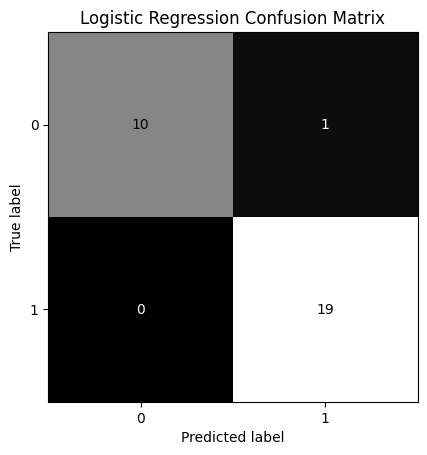

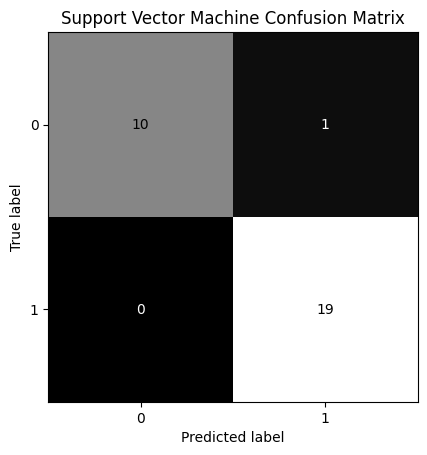

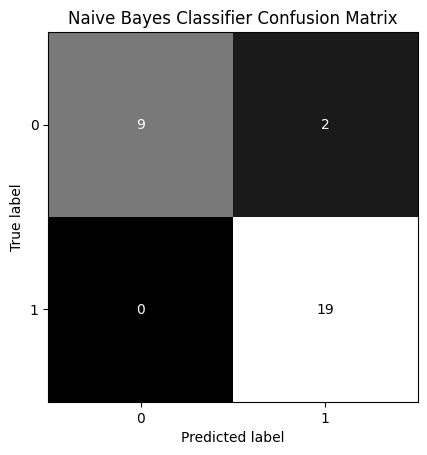

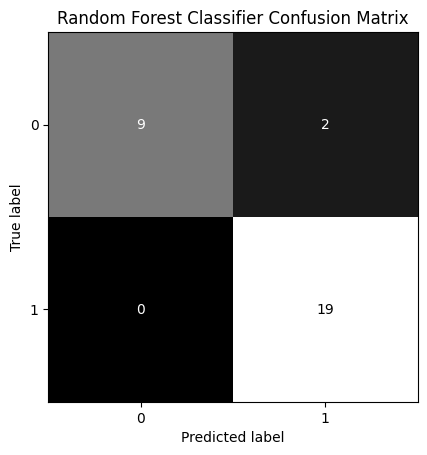

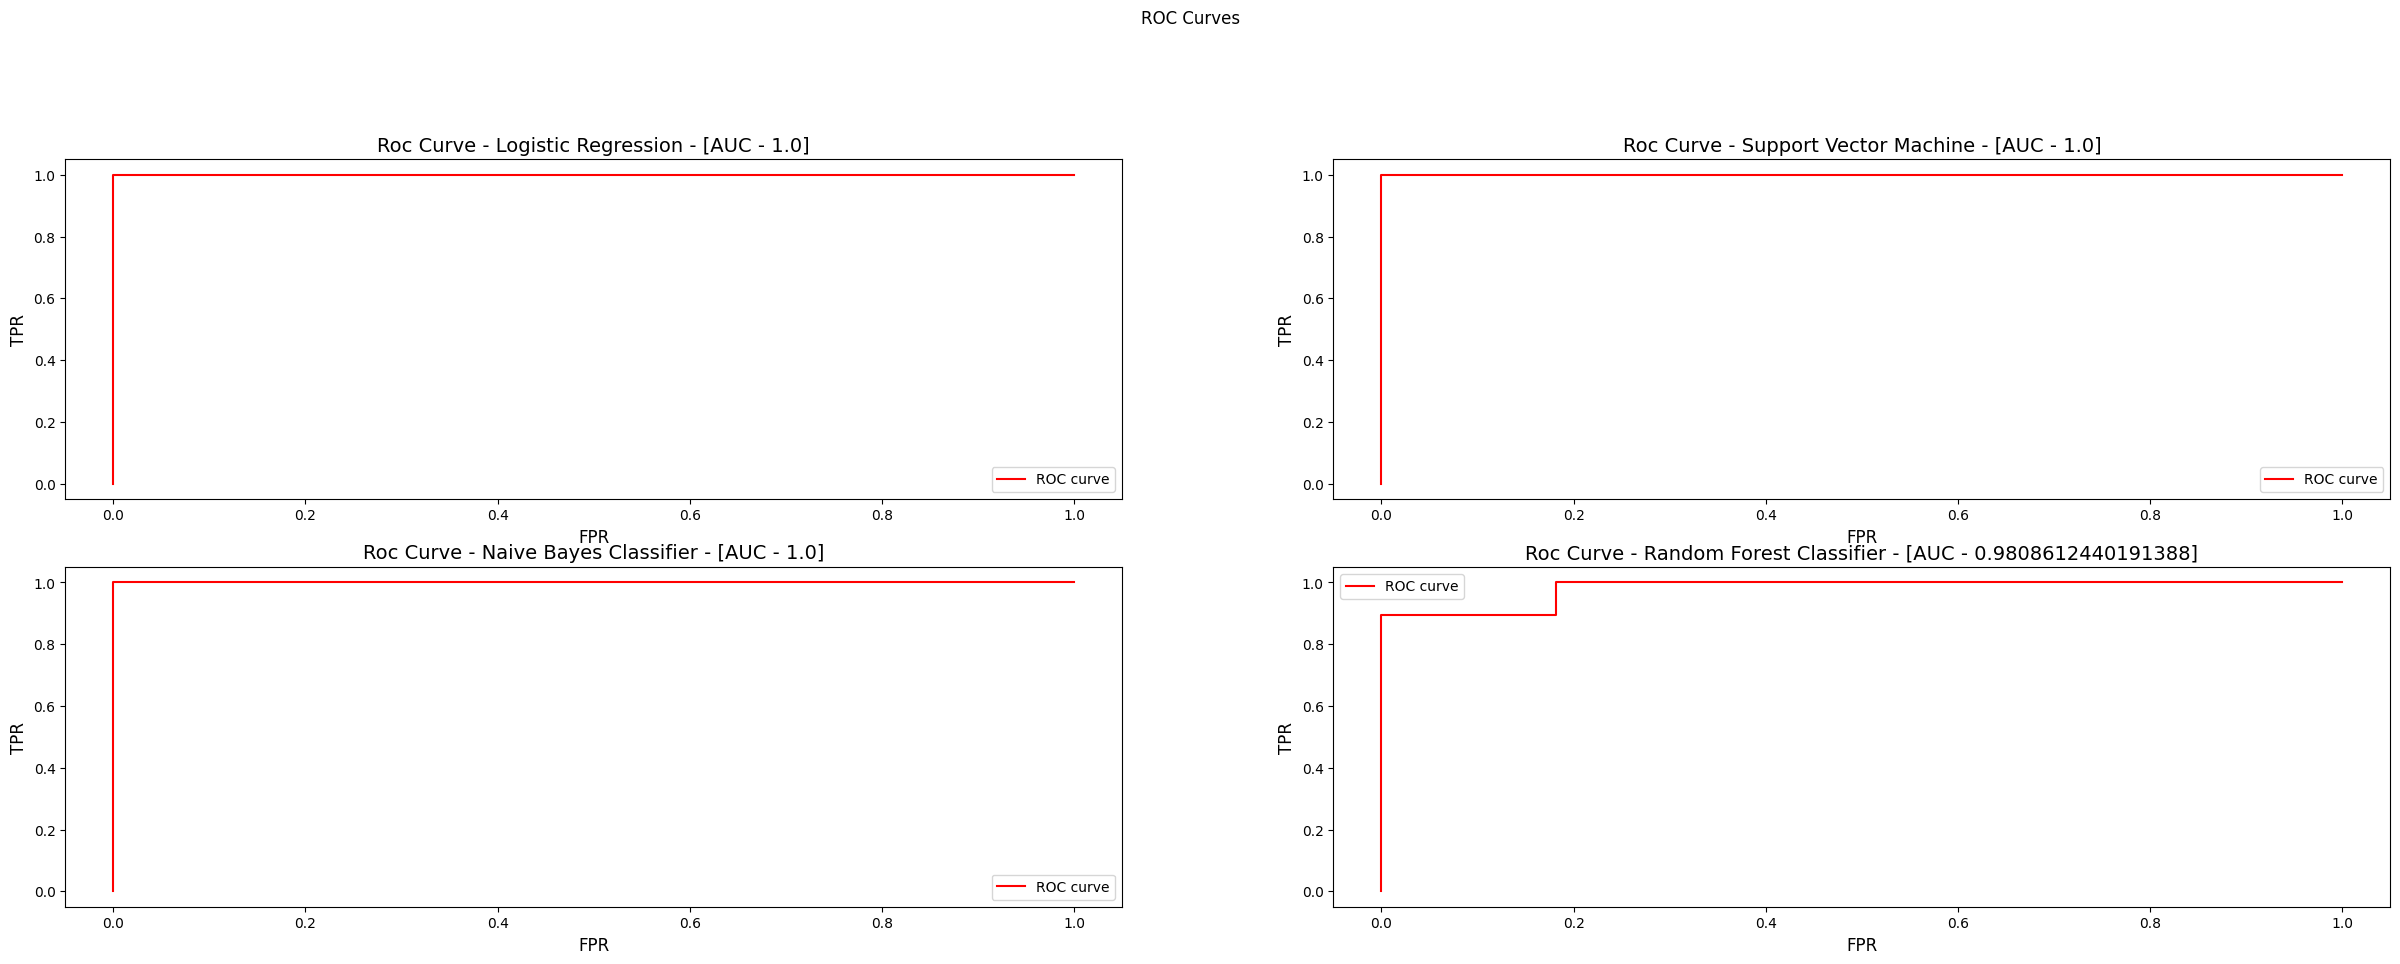

In [27]:
# EVALUATE MODELS

# print classification reports for all models
print('Linear Regression: \n', classification_report(y_test, y_lc_predicted))
print('SVM: \n', classification_report(y_test, y_svc_predicted))
print('Naive Bayes: \n', classification_report(y_test, y_nbc_predicted))
print('Random Forest: \n', classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1


# plot confusion matrices for all models
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

# plot ROC curves for all models
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

### Now using SMOTE in an attempt to see if I can create better results

Linear Regression: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

SVM: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Naive Bayes: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.

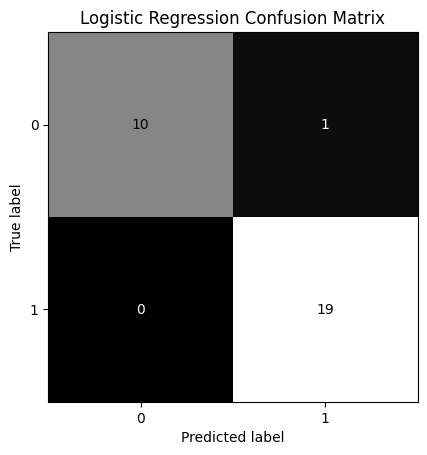

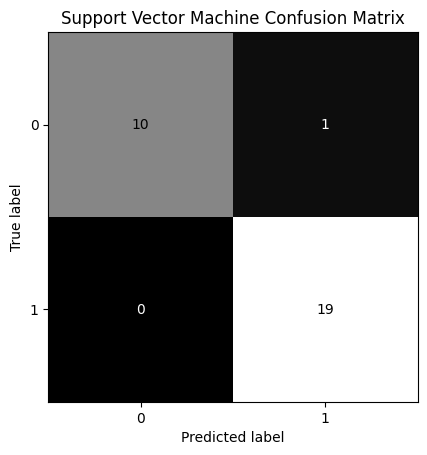

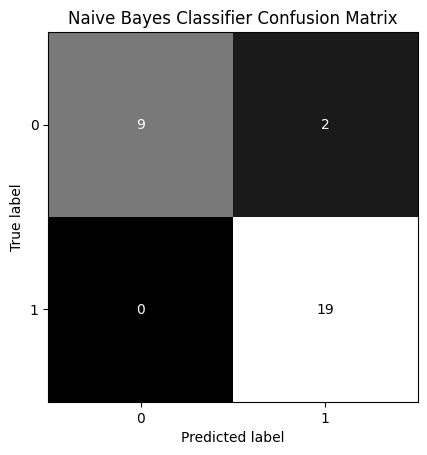

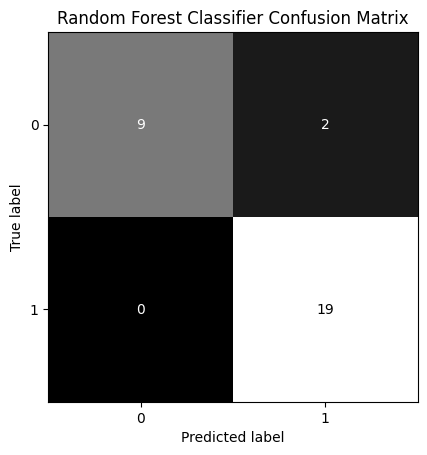

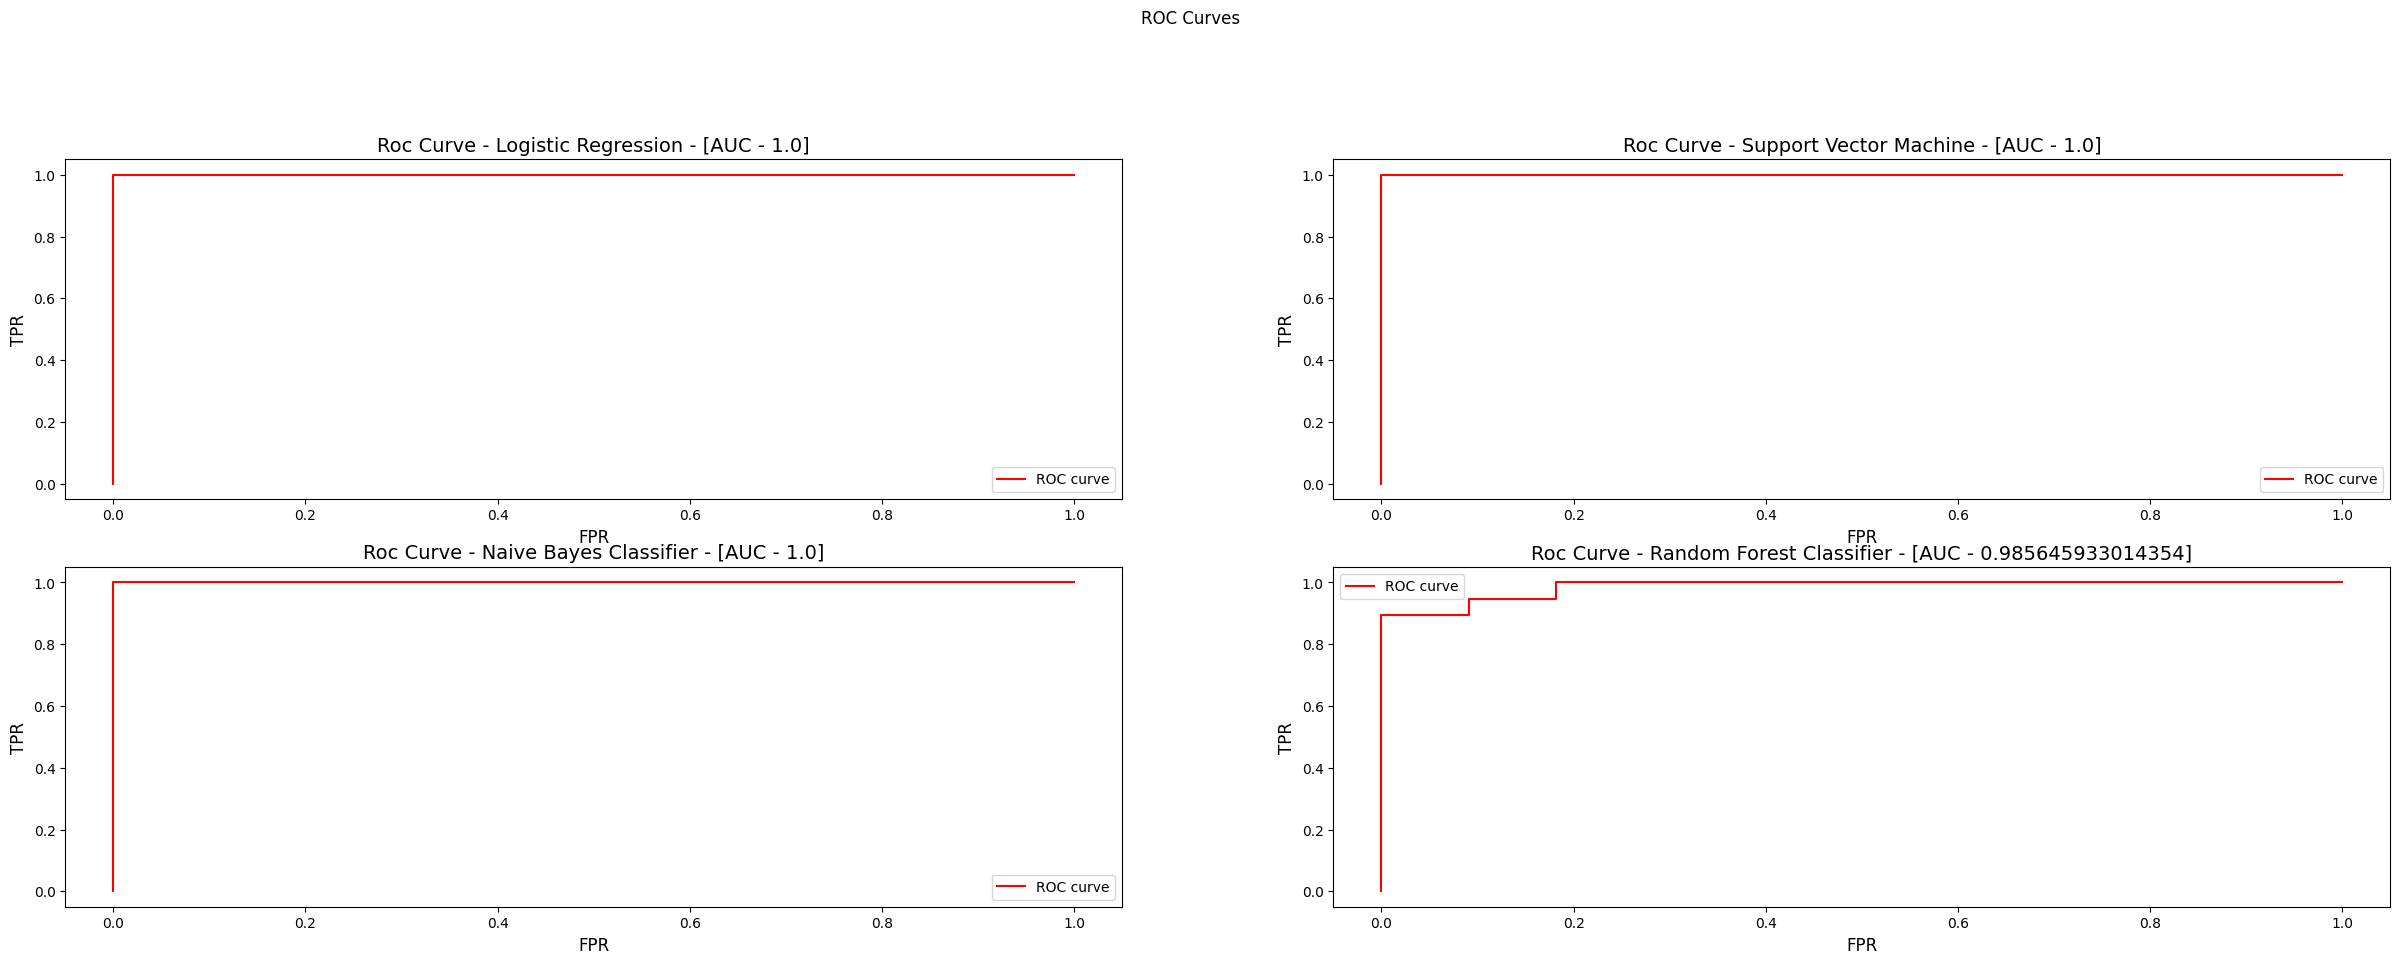

In [28]:
from imblearn.over_sampling import SMOTE

# use SMOTE to randomly increase minority class examples by replicating them
# aim is to give the model a more even appreciation of the training data
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)


# create models, again
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# fit models to SMOTE altered data
lc.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)


y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)


y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)


# print classification reports for all models
print('Linear Regression: \n', classification_report(y_test, y_lc_predicted))
print('SVM: \n', classification_report(y_test, y_svc_predicted))
print('Naive Bayes: \n', classification_report(y_test, y_nbc_predicted))
print('Random Forest: \n', classification_report(y_test, y_rfc_predicted))


# plot models using confusion matrices
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

    
# plot ROC curves for all models
plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()